In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('yelp_labelled.txt', header=None, sep='\t')
df.columns = ('Review','Score')

In [6]:
df.head()

,Review,Score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
pd.options.display.max_rows = 999
common = pd.Series(' '.join(df['Review']).lower().split()).value_counts()[:200]


In [8]:
common
#good, great, 'will go', 'best', nice, friendly, **deifnitely, love, would recommend, would go, 
#will be, will definitely, would definitely, am definitely , awesome, excellent, 
#disappointed, perfect, amazing, absolutely **

the              582
and              388
i                303
was              292
a                237
to               216
is               171
this             142
of               125
not              115
it               110
for              107
in               104
food              92
we                79
place             77
very              74
my                72
with              71
so                66
had               66
be                66
are               62
that              62
good              62
but               61
were              61
have              61
great             57
you               56
service           56
they              56
at                55
on                54
like              45
our               41
go                40
will              37
as                36
here              36
back              36
all               35
time              35
just              34
really            33
an                32
their             31
if           

In [14]:
good_keywords=['good','great','will go','best','nice','friendly','definitely','love','loved','liked','would recommend','would go','will be','will definitely','would definitely','am definitely','awesome','excellent','perfect','amazing','absolutely']

for words in good_keywords:
    df[str(words)] = df.Review.str.contains(
    ' ' + str(words) + ' ',
    case=False
    )

In [15]:
df.head()

,Review,Score,good,great,will go,best,nice,friendly,definitely,love,...,will definitely,would definitely,am definitely,awesome,excellent,perfect,amazing,absolutely,loved,liked
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df['B_Score'] = (df.Score == 1)

In [17]:
df.head()

,Review,Score,good,great,will go,best,nice,friendly,definitely,love,...,would definitely,am definitely,awesome,excellent,perfect,amazing,absolutely,loved,liked,B_Score
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


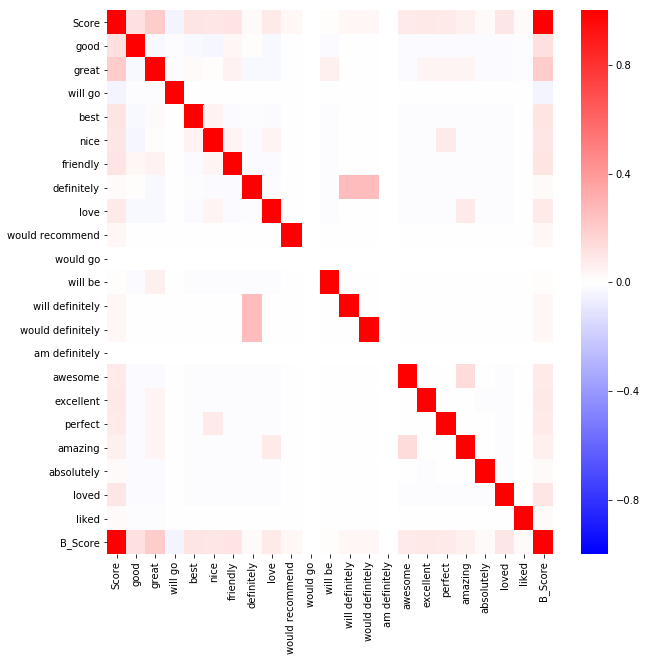

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'bwr', vmin = -1, vmax = 1)

In [25]:
data = df[good_keywords]
target = df.B_Score

In [27]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data,target)
y_pred = bnb.predict(data)
print ("Number of correctly labeled reviews out of a total of {} reviews: {}".format(
    data.shape[0],
    (target == y_pred).sum()
))

Number of correctly labeled reviews out of a total of 1000 reviews: 643


In [28]:
##question for rod: is this looking at any situation 

In [33]:
#Test on amazon dataset
df2 = pd.read_csv('amazon_cells_labelled.txt', header=None, sep='\t')
df2.columns = ('Review','Score')
df2['B_Score'] = (df.Score == 1)
df2.head()

,Review,Score,B_Score
0,So there is no way for me to plug it in here i...,0,True
1,"Good case, Excellent value.",1,False
2,Great for the jawbone.,1,False
3,Tied to charger for conversations lasting more...,0,True
4,The mic is great.,1,True


In [34]:
for words in good_keywords:
    df2[str(words)] = df2.Review.str.contains(
    ' ' + str(words) + ' ',
    case=False
    )
    
data2 = df2[good_keywords]
target2 = df2.B_Score

In [35]:
bnb2 = BernoulliNB()
bnb2.fit(data2,target2)
y_pred2 = bnb2.predict(data2)
print ("Number of correctly labeled reviews out of a total of {} reviews: {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))

Number of correctly labeled reviews out of a total of 1000 reviews: 536


In [ ]:
#barely better than coinflip for amazon reviews